<h1><center>Crop Recommentation System</center></h1>

In [1]:
## import packages

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# import plotly.express as px
# from plotly.offline import iplot, init_notebook_mode
import lightgbm as lgb
# to gnore warning

import warnings
warnings.filterwarnings('ignore')


## import packages

# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
# from tensorflow.keras import Model 
# from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
# from tensorflow.keras.models import Model
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.applications.inception_v3 import preprocess_input
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
# from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
## import data 

import pandas as pd

classes = ['Paddy', 'Ragi','Cotton', 'Sugarcane','Chilli', 'Pigeon Pea', 
            'Coconut', 'Onion', 'Banana','Mangoes', 'Turmeric', 'Groundnut', 
            'Maize', 'Brinjal', 'Carrot', 'Beans']

df = pd.read_csv("Crop.csv")

X = df.drop('label' ,axis=1)
y = df['label']



In [3]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [4]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
print(X_test[0])

[-0.26101362 -0.20356696 -0.56395103  0.3532217   1.14637716  0.32506727
 -1.06744001]


In [5]:
# model training
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
l = [199.89, 20.80, 134.22, 92.333383, 5.929663, 112.654779, 22.630942]

In [6]:
import joblib
 
joblib.dump(model, 'predict1.pkl')

k = joblib.load('predict1.pkl')
 
k = k.predict_proba([l])

list_proba = []
for i in [-1,-2,-3,-4,-5]:
    list_proba.append(classes[np.argsort(np.max(k, axis=0))[i]])
list_proba


['Brinjal', 'Onion', 'Mangoes', 'Chilli', 'Coconut']

## Data fields
* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %
* ph - ph value of the soil
* rainfall - rainfall in mm

In [7]:
## shape

print("The Shape of the Dataset is: {}" .format(df.shape))
print("The number of the columns in the Dataset is: {}" .format(df.shape[1]))
print("The Shape of the row in the Dataset is: {}" .format(df.shape[0]))

The Shape of the Dataset is: (1400, 8)
The number of the columns in the Dataset is: 8
The Shape of the row in the Dataset is: 1400


In [8]:
## info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1400 non-null   int64  
 1   P            1400 non-null   int64  
 2   K            1400 non-null   int64  
 3   temperature  1400 non-null   float64
 4   humidity     1400 non-null   float64
 5   ph           1400 non-null   float64
 6   rainfall     1400 non-null   float64
 7   label        1400 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 87.6+ KB


In [9]:
# type of data

df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
## count unique values in 'label' columns

df['label'].value_counts()

rice          100
maize         100
Beans         100
Brinjal       100
pigeonpeas    100
Carrot        100
Chilli        100
Groundnut     100
Onion         100
Ragi          100
banana        100
mango         100
Sugarcane     100
Turmeric      100
Name: label, dtype: int64

In [11]:
## lets check null values

df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Great!!, the dataset is clear... there us no data null values

## Descriptive Statistics

In [12]:
## descripe

df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,43.015000,57.690714,44.941429,25.276862,63.582279,6.419241,92.629221
std,32.811554,29.276517,46.441576,5.097089,22.937849,0.867631,51.445568
min,0.000000,5.000000,15.000000,8.825675,14.258040,3.504752,30.920140
25%,18.750000,38.000000,20.000000,21.324722,50.504269,5.853601,58.464692
50%,33.000000,58.000000,25.000000,25.542330,67.088927,6.370568,78.114942
75%,68.250000,72.000000,47.000000,28.660397,82.767249,6.920651,106.968871
max,120.000000,145.000000,205.000000,41.948657,94.998975,9.935091,298.560117


In [13]:
## pivot table based on label

df_label = pd.pivot_table(df, index=['label'], aggfunc='mean')
df_label.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
Beans,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
Brinjal,20.05,20.75,67.54,21.605357,5.749411,105.919778,20.115085
Carrot,20.23,21.44,48.01,53.160418,6.831174,51.198487,28.194920
Chilli,19.87,20.99,47.28,85.499975,6.723957,48.403601,28.525775
Groundnut,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340


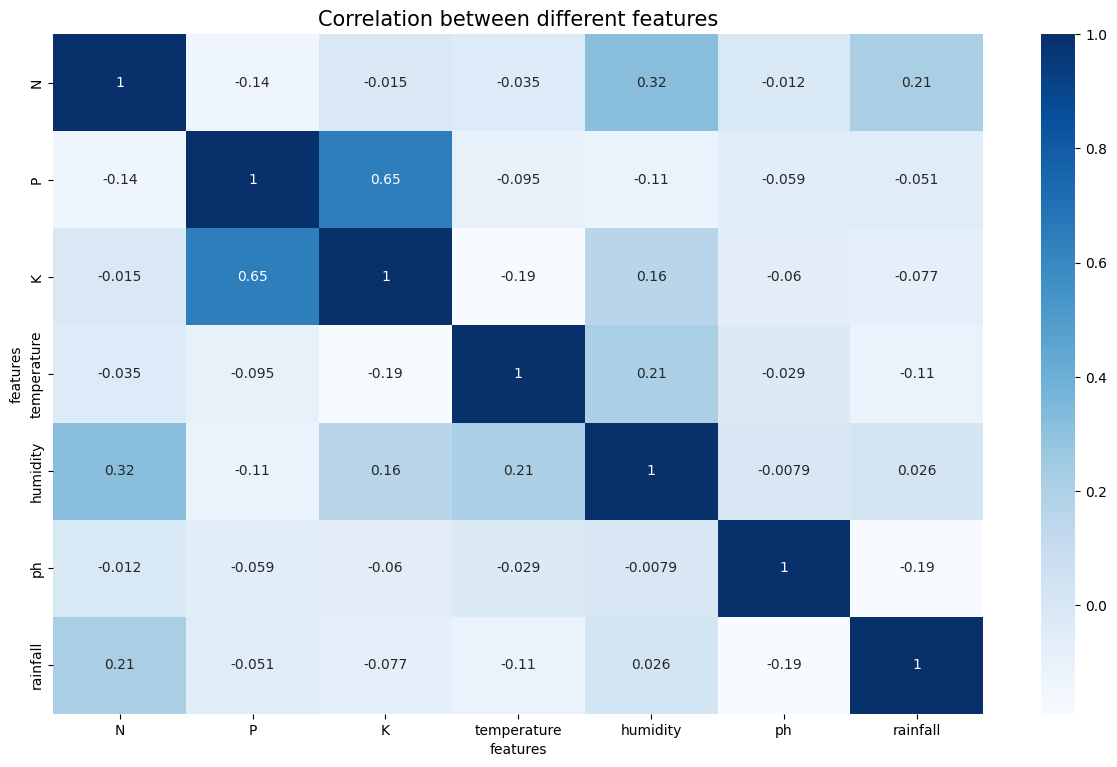

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9), dpi=100)
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('Correlation between different features', fontsize = 15, c='black')
# plt.tight_layout()
plt.show()

## Data Pre-Processing

In [15]:
## Lets make Climax of the project

X = df.drop('label', axis =1)
y = df['label']

In [16]:
## train test split

from sklearn.model_selection import train_test_split
# help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
## StandardScaler 

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [18]:
print(scalar.mean_)

[43.59107143 58.08482143 45.90803571 25.2884013  63.78007548  6.42268852
 92.96824588]


<h1><center>Model Development</center></h1>

In [19]:
## model training

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [20]:
# predict the results

y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def Metrics_calculator(y_pred, y_test):
    accuracy = accuracy_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test, pos_label='positive', average='micro')
    recall = recall_score(y_pred, y_test, pos_label='positive', average='micro')
    f1 = f1_score(y_pred, y_test, pos_label='positive', average='micro')
    
    return accuracy, precision, recall, f1

In [22]:
lgb_accuracy, lgb_precision, lgb_recall, lgb_f1 = Metrics_calculator(y_pred, y_test)

In [23]:
print('Accuracy of the lightgbm Model is: ', lgb_accuracy)
print('Precision of the lightgbm Model is: ', lgb_precision)
print('Recall of the lightgbm Model is: ', lgb_recall)
print('F1 of the lightgbm Model is: ', lgb_f1)

Accuracy of the lightgbm Model is:  0.9964285714285714
Precision of the lightgbm Model is:  0.9964285714285714
Recall of the lightgbm Model is:  0.9964285714285714
F1 of the lightgbm Model is:  0.9964285714285714


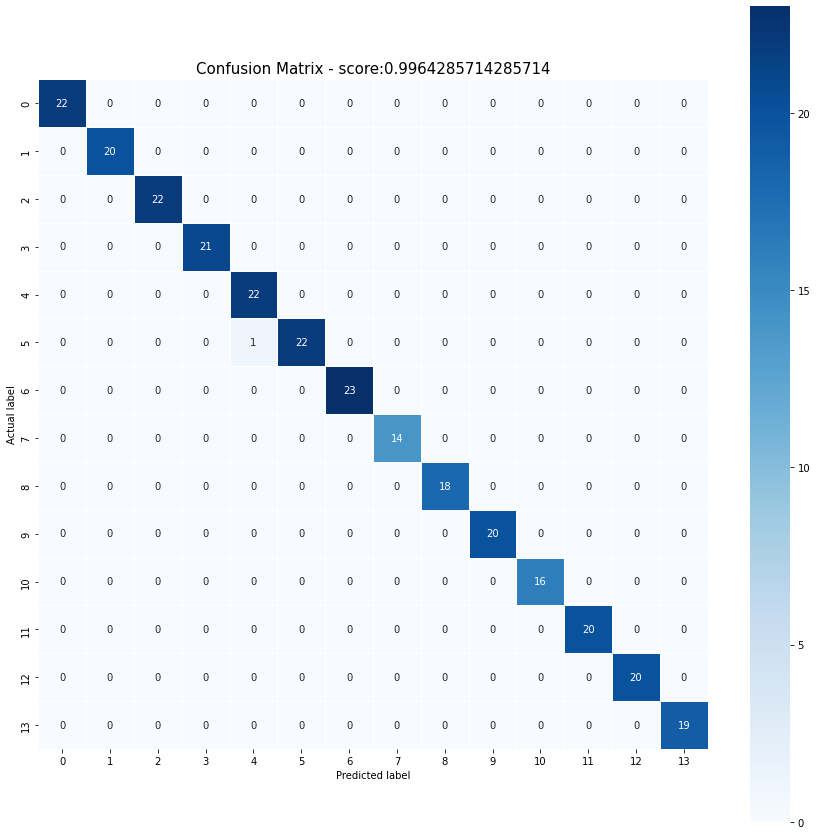

In [24]:
## confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()